In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error  #importing basic things
from math import sqrt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf  #autocorrelation function plot autocorrelation is basically our signal and our signal with a time lag and ur place these signals on top of one another

In [3]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [4]:
from statsmodels.tsa.arima_model import ARIMA #arima model

In [5]:
df1 = pd.read_csv('Demand Forecast - MEAT train.csv', parse_dates=True, index_col=[0])  #very imp setting date as index
df1.head()

,DEMAND
DATE,
2019-07-01,150
2019-07-02,10
2019-07-03,0
2019-07-04,50
2019-07-05,90


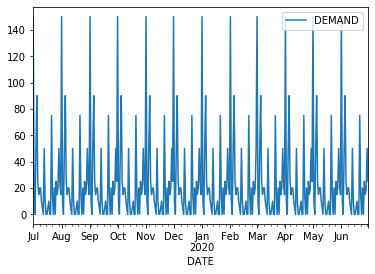

In [6]:
df1.plot()
plt.show()

In [7]:
demand_diff = df1.diff(periods=30)

In [8]:
demand_diff = demand_diff[30:]
demand_diff.head()

,DEMAND
DATE,
2019-07-31,-135.0
2019-08-01,140.0
2019-08-02,10.0
2019-08-03,-50.0
2019-08-04,-40.0


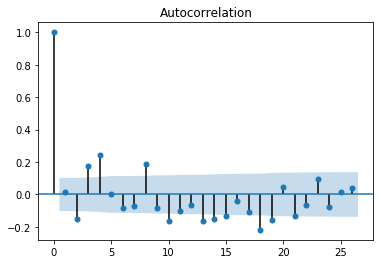

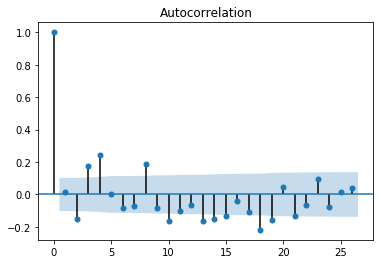

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.values)

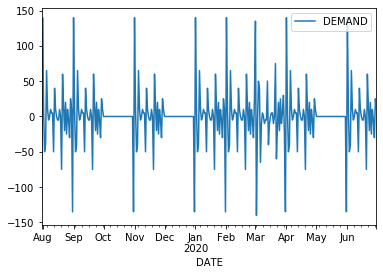

In [10]:
demand_diff.plot()


In [11]:
X1 = df1.values
train1 = X1[0:337]
test1 = X1[337:]

In [12]:
model_arima = ARIMA(train1,order=(18,1,1))

In [13]:
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

3241.9765521782165


In [35]:
y_pred1 = model_arima_fit.forecast(steps=366)[0].tolist()

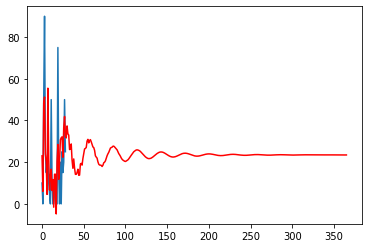

In [36]:
plt.plot(test1)
plt.plot(y_pred1 , color = 'red')

In [37]:
y_pred1 #the predicted values

[23.038294137139587,
 5.989806839779561,
 48.34030332744479,
 51.26142321866635,
 23.99761592130664,
 20.240501388998346,
 4.543561764948226,
 55.490097825769126,
 21.97506675255051,
 6.582595810700793,
 13.119889633218463,
 16.610439380292483,
 6.420929544318721,
 11.670049124412486,
 -1.605337224260042,
 14.213988227952937,
 14.232999762131485,
 -4.825999341604991,
 20.419312459067065,
 28.480602386794153,
 11.750060419198157,
 20.380060198804188,
 30.722065261658784,
 31.715716801423827,
 32.13758497501927,
 22.373826250175565,
 36.68438602034833,
 41.91137940615622,
 32.4455848057532,
 31.63301707778407,
 37.38814568363394,
 33.59885598974674,
 33.0091610647278,
 26.043030439906317,
 26.46877559273175,
 28.74384578443082,
 20.92374673078951,
 17.055453820954355,
 21.549146494708246,
 17.1612665702891,
 14.162397253843903,
 14.176384689021495,
 15.014728688063327,
 16.62098435962302,
 13.691715718843312,
 13.802266275743229,
 19.134202734208127,
 19.416644344857627,
 18.577440872504

In [28]:
test1 #actual values

array([[10],
       [ 0],
       [50],
       [90],
       [25],
       [15],
       [20],
       [20],
       [10],
       [ 5],
       [ 0],
       [50],
       [10],
       [ 0],
       [ 0],
       [ 5],
       [10],
       [ 0],
       [ 0],
       [75],
       [15],
       [ 0],
       [20],
       [ 0],
       [25],
       [15],
       [20],
       [50],
       [25]], dtype=int64)

In [29]:
from sklearn.metrics import r2_score
acc = r2_score(test1, y_pred1)
print(acc)  #67% accurate

0.35351543765118143


In [32]:
import pickle

In [33]:
filename='model_meat.pkl'
pickle.dump(model_arima_fit, open(filename, 'wb'))

In [34]:
model = pickle.load(open(filename, 'rb'))